In [2]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\Jagdish\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We have to use  only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare columns

In [6]:
tit = titanic.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'], axis=1  )
tit.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [7]:
print(tit.shape)
tit.describe()

(891, 7)


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
tit.isna().sum()
#Age columns has null value

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [9]:
print(tit.dtypes)
tit.columns[tit.dtypes == object]
# 1 categorical column present in dataset

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object


Index(['Sex'], dtype='object')

We will Handle categorical feature 'Sex' by replacing Male and Female with number

In [10]:
tit['Sex'] = tit['Sex'].map({'male':1, 'female':0})
tit.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [11]:
mean_val = tit['Age'].mean()
tit['Age'] = tit['Age'].fillna(mean_val)

In [12]:
tit.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [13]:
#Now We will replace age feature witn new values
tit['Age_n'] = pd.cut(tit['Age'],5)
tit[['Age_n','Survived']].groupby(['Age_n'], as_index=False).mean()

,Age_n,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [14]:
tit=tit.drop(columns=['Age_n'], axis=1)

In [15]:
#We changed age feature in 5 group
tit.loc[ tit['Age'] <= 16, 'Age'] = 0
tit.loc[(tit['Age'] > 16) & (tit['Age'] <= 32), 'Age'] = 1
tit.loc[(tit['Age'] > 32) & (tit['Age'] <= 48), 'Age'] = 2
tit.loc[(tit['Age'] > 48) & (tit['Age'] <= 64), 'Age'] = 3
tit.loc[ tit['Age'] > 64, 'Age']
tit.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,1.0,1,0,7.2500
1,1,1,0,2.0,1,0,71.2833
2,1,3,0,1.0,0,0,7.9250
3,1,1,0,2.0,1,0,53.1000
4,0,3,1,2.0,0,0,8.0500


In [16]:
X = tit.drop(columns=['Survived'])
y = tit.Survived

In [17]:
x_train,x_test, y_train,y_test =  train_test_split(X,y, test_size=0.25, random_state=15)

In [18]:
clf= DecisionTreeClassifier()
clf.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [75]:
clf.score(x_train,y_train)
y_pred = clf.predict(x_test)
clf.score(x_test,y_test)

0.7574626865671642

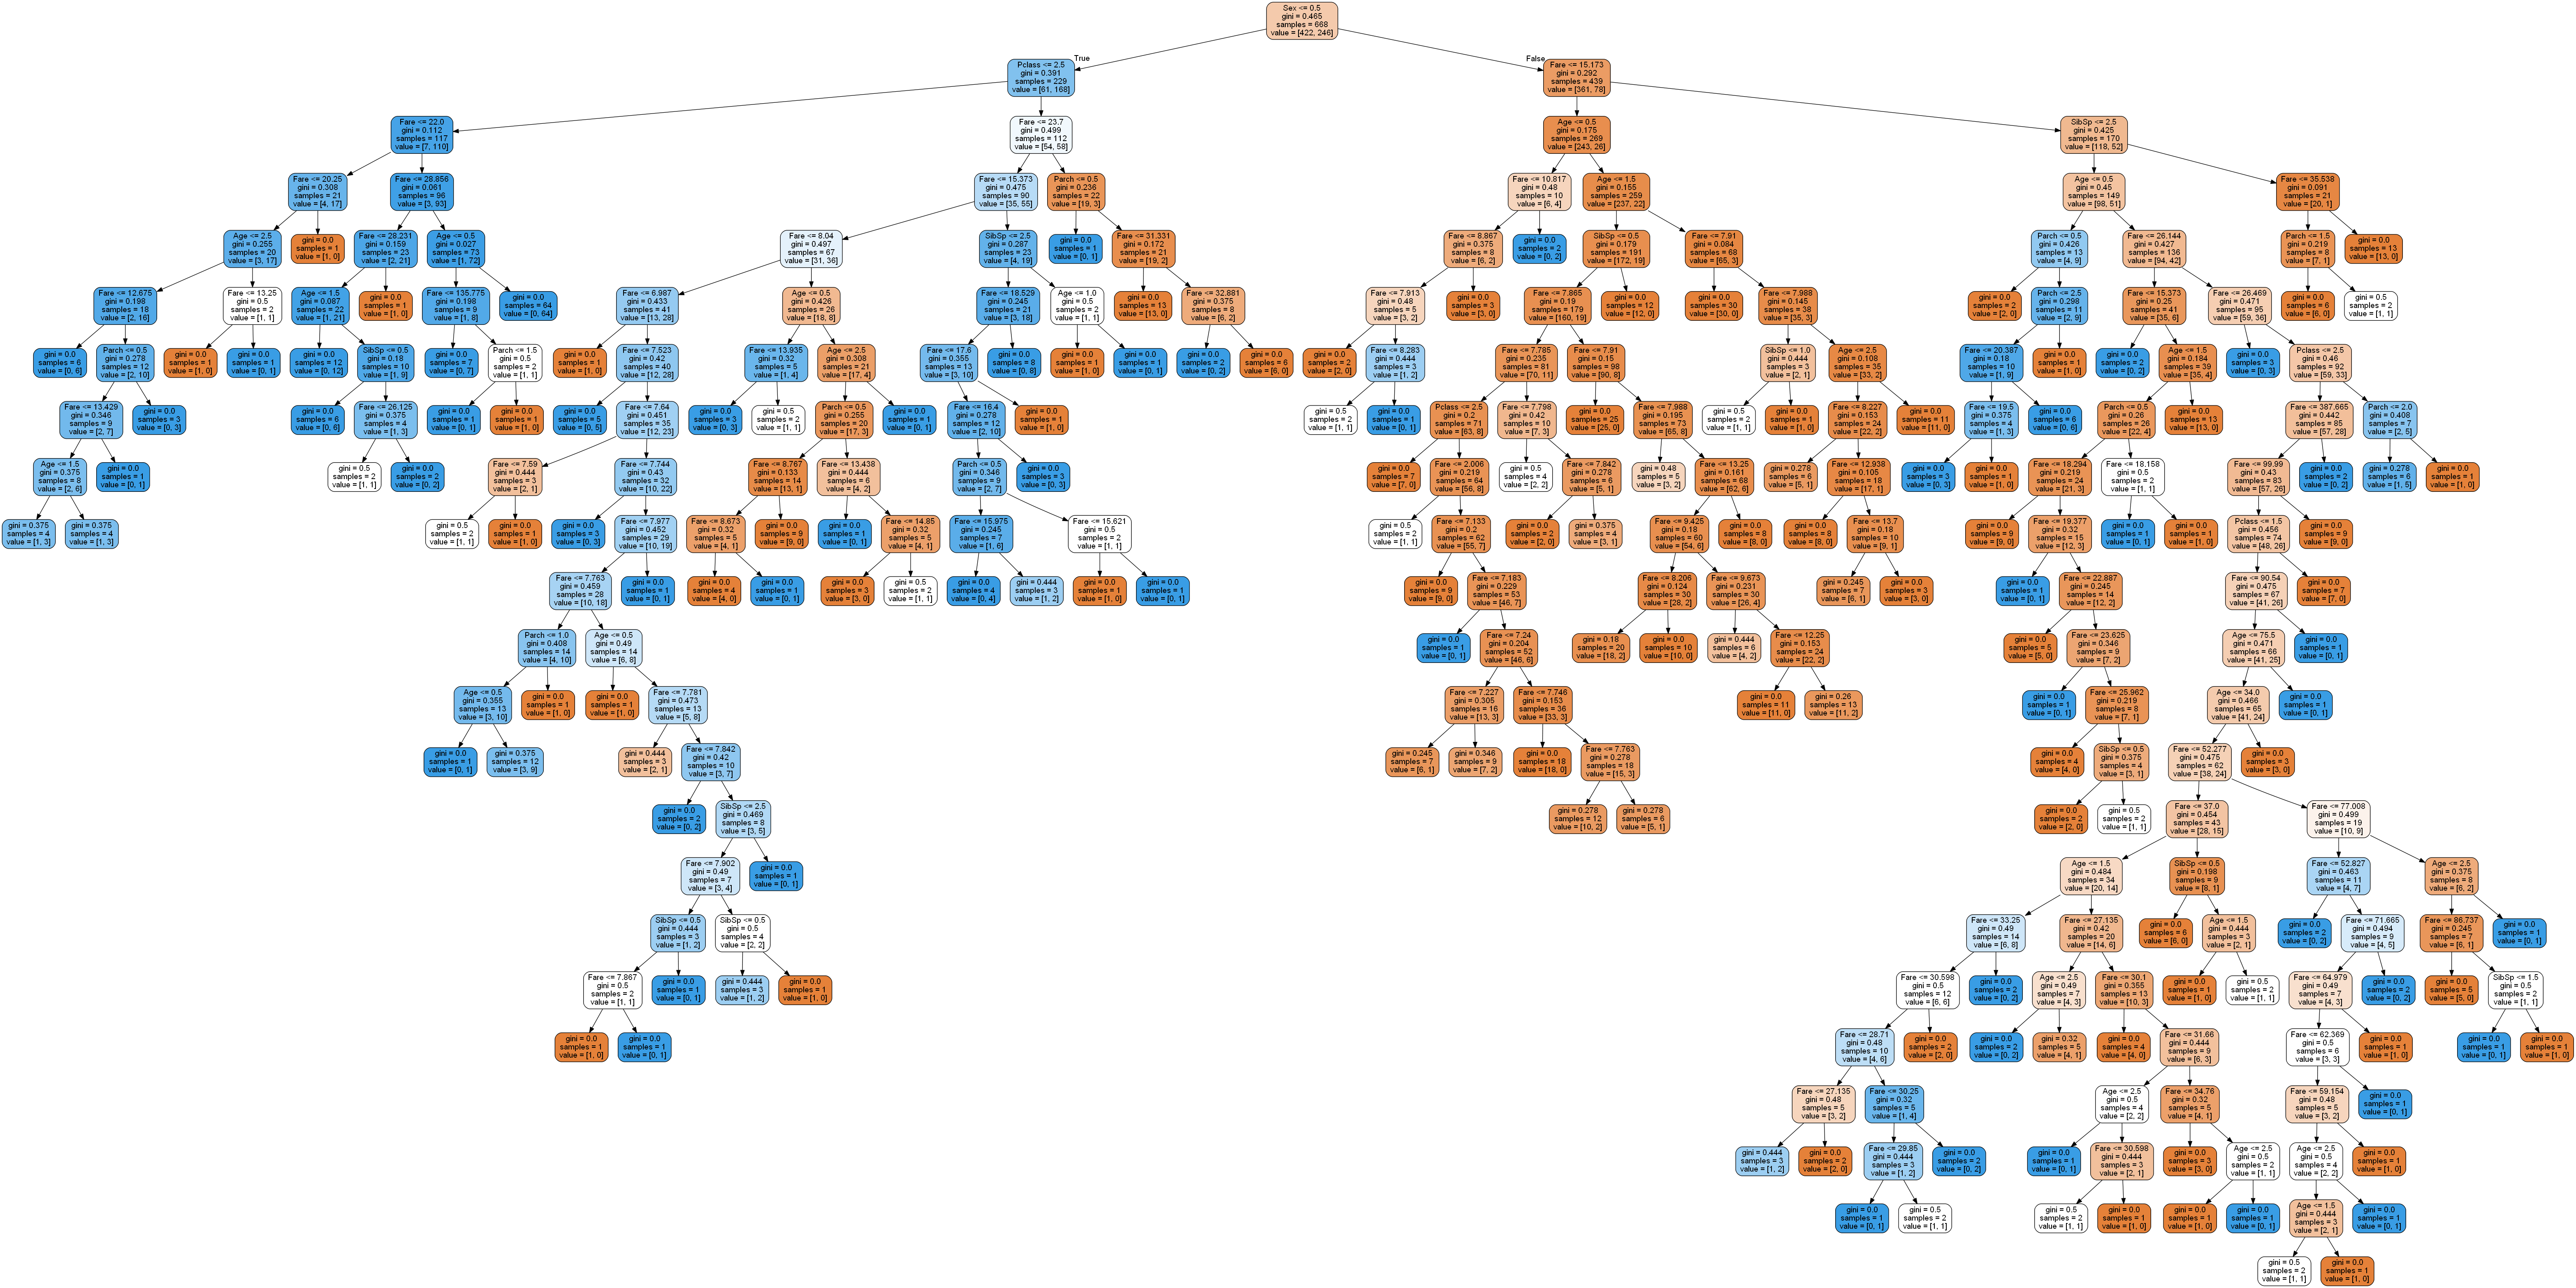

In [20]:
# create a dot_file which stores the tree structure
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import pydotplus
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [26]:
scaler =  StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
x_train,x_test, y_train,y_test =  train_test_split(X_scaled,y, test_size=0.25, random_state=15)

In [30]:
clf.score(x_train,y_train)
y_pred = clf.predict(x_test)
clf.score(x_test,y_test)

0.7713004484304933

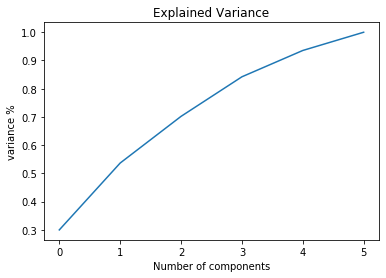

In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pc = pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('variance %')
plt.title('Explained Variance')
plt.show()
# PCA for scaled data

In [50]:
pca = PCA(n_components=4)
new_data =  pca.fit_transform(X_scaled)
pca_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4'])

In [51]:
pca_x.head()

,PC-1,PC-2,PC-3,PC-4
0,-0.965533,-0.639033,0.241354,-0.562067
1,1.560507,1.045430,-0.604546,0.512254
2,-0.464878,-0.421396,-0.790429,1.380275
3,1.352131,0.922044,-0.592438,0.617501
4,-1.299819,-0.151283,0.072776,-0.236149


In [57]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(pca_x,y,test_size = 0.30, random_state= 15)
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7947761194029851

Let's now try to tune some hyperparameters using the GridSearchCV algorithm

In [60]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [61]:
grid_search = GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs =-1)

In [62]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [63]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'}


In [64]:
grid_search.best_score_

0.8139354838709678

In [65]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =18, min_samples_leaf= 3, min_samples_split= 2, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=18, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [66]:
clf.score(x_test,y_test)

0.7574626865671642

In [70]:
#This is how we build decision tree model by using pramenter with the help of gridsearch algoritm
# We got better accuracy with the help of PCA rather than hyper parameter tunning